<a href="https://colab.research.google.com/github/Shivang-Quantum/QuantaPytha/blob/Tutort/Deep%20Learning/Batch_Normalization_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, BatchNormalization

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Tutort/datasets/bn_data.csv",header=None)

In [6]:
df

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0
...,...,...,...
495,2.177895,2.984489,1.0
496,1.778905,2.869205,1.0
497,0.894180,3.069959,0.0
498,0.849439,3.875435,0.0


In [7]:
df.rename(columns={0:"x",1:"y",2:"class"},inplace=True)

In [8]:
df

,x,y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0
...,...,...,...
495,2.177895,2.984489,1.0
496,1.778905,2.869205,1.0
497,0.894180,3.069959,0.0
498,0.849439,3.875435,0.0


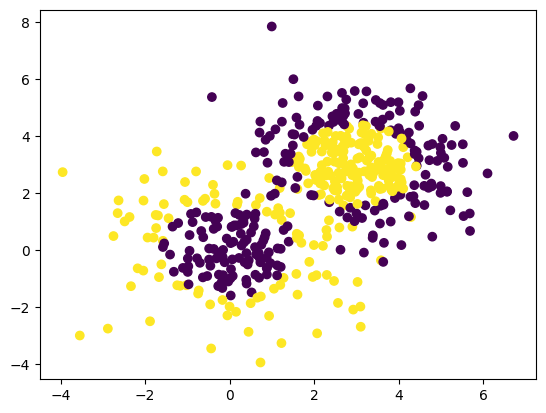

In [11]:
plt.scatter(df['x'],df['y'],c=df['class'])

In [13]:
x=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [20]:
# Without Normalization
model_1=Sequential()

model_1.add(Dense(2,activation='relu',input_dim=2))
model_1.add(Dense(2, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history1 = model_1.fit(x,y, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 20ms/step - loss: 1.1821 - accuracy: 0.4700 - val_loss: 1.2257 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 1.1002 - accuracy: 0.4675 - val_loss: 1.1194 - val_accuracy: 0.5700
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 1.0264 - accuracy: 0.4600 - val_loss: 1.0230 - val_accuracy: 0.5700
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 0.9607 - accuracy: 0.4475 - val_loss: 0.9385 - val_accuracy: 0.5700
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.9039 - accuracy: 0.4450 - val_loss: 0.8677 - val_accuracy: 0.5700
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.8567 - accuracy: 0.4375 - val_loss: 0.8117 - val_accuracy: 0.5700
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 0.8167 - accuracy: 0.4350 - val_loss: 0.7691 - val_accuracy: 0.5700
Epoch 8/200


In [24]:
# With Normalization
model_2=Sequential()

model_2.add(Dense(2,activation='relu',input_dim=2))
model_2.add(BatchNormalization())
model_2.add(Dense(2, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 batch_normalization_2 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 batch_normalization_3 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 23 (9

In [26]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history2 = model_2.fit(x,y, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 2s 21ms/step - loss: 0.7942 - accuracy: 0.5200 - val_loss: 0.6940 - val_accuracy: 0.4300
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7958 - accuracy: 0.5325 - val_loss: 0.6954 - val_accuracy: 0.4300
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7763 - accuracy: 0.5325 - val_loss: 0.6968 - val_accuracy: 0.4300
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7724 - accuracy: 0.5125 - val_loss: 0.6984 - val_accuracy: 0.4300
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7537 - accuracy: 0.5200 - val_loss: 0.6999 - val_accuracy: 0.4300
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7546 - accuracy: 0.5050 - val_loss: 0.7014 - val_accuracy: 0.4300
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7580 - accuracy: 0.5125 - val_loss: 0.7027 - val_accuracy: 0.4300
Epoch 8/200


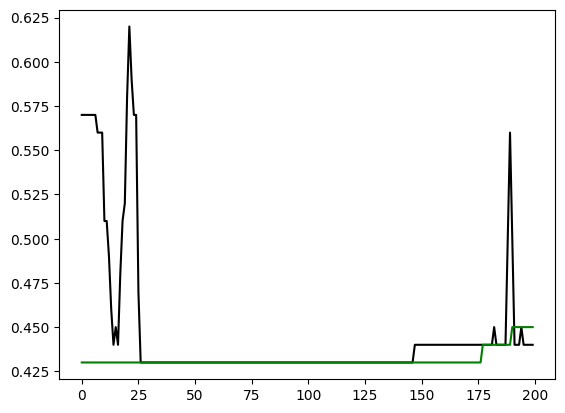

In [29]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')